#  Amazon Alexa Reviews Sentiment Analysis Machine Learning  

### Importing  libraries

In [1]:
#import nltk
#nltk.download('stopwords') 
#nltk.download('punkt')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

### Load the dataset 

In [3]:
df = pd.read_csv('amazon_alexa.tsv',sep='\t')


### Reading the dataset

In [4]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
df.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


### Descriptive Analysis

In [6]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [8]:
df["variation"].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

### Univariate  and Bivariate  analysis

<Axes: xlabel='rating', ylabel='count'>

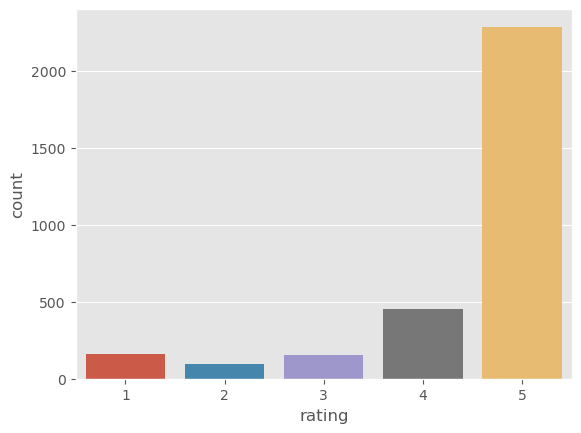

In [9]:
sns.countplot(x='rating', data=df)

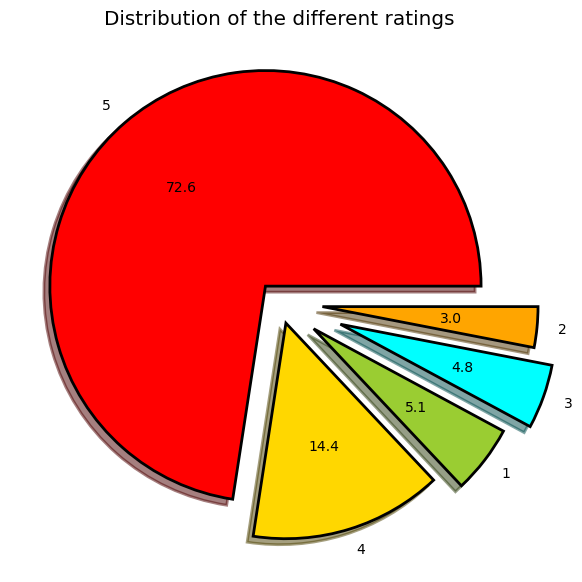

In [10]:
fig = plt.figure(figsize=(7,7))
colors = ("red","gold","yellowgreen","cyan","orange")
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df['rating'].value_counts()
explode = (0.1,0.1,0.2,0.3,0.2)
tags.plot(kind='pie', autopct='%1.1f',colors=colors, shadow=True,
          startangle=0, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of the different ratings')
plt.show()

<Axes: xlabel='variation', ylabel='count'>

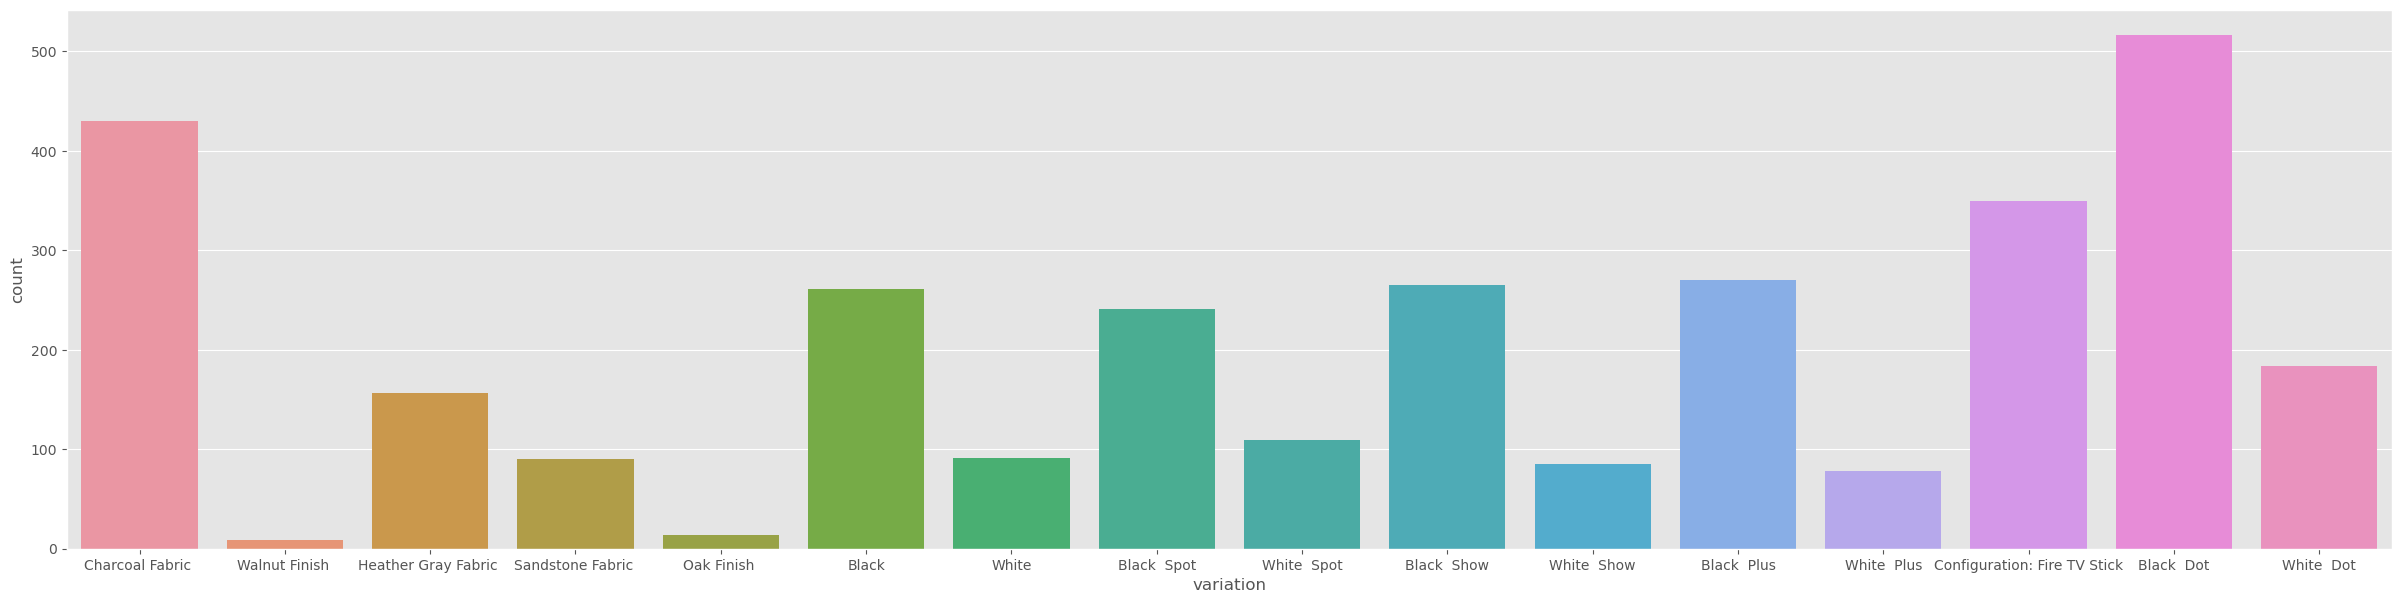

In [11]:
fig = plt.figure(figsize=(30,7))
sns.countplot(x="variation",data=df)

<Axes: xlabel='count', ylabel='variation'>

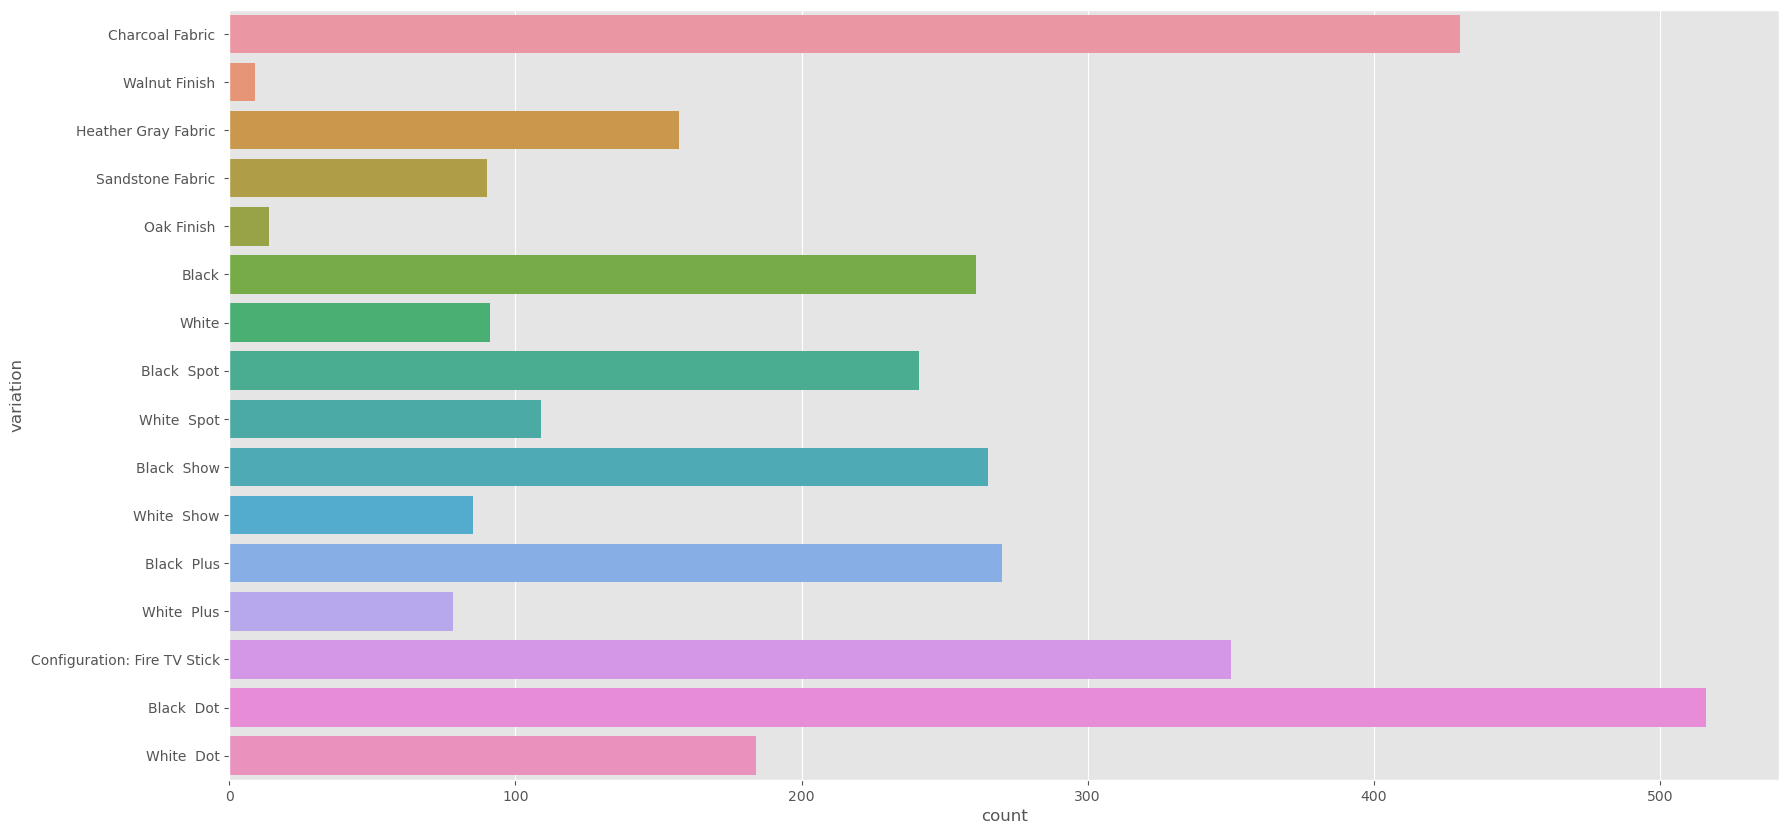

In [12]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y="variation",data=df)

In [13]:
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

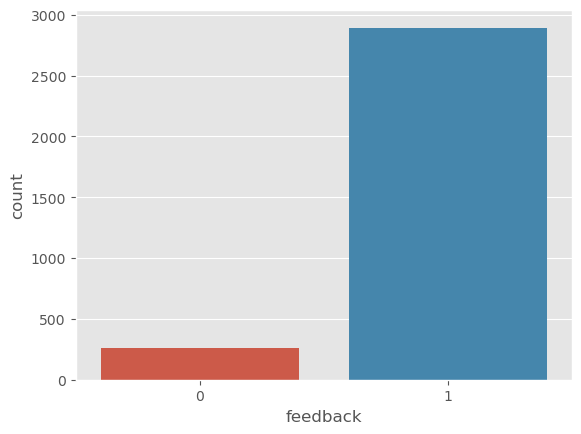

In [14]:
sns.countplot(x='feedback', data=df)
plt.show()

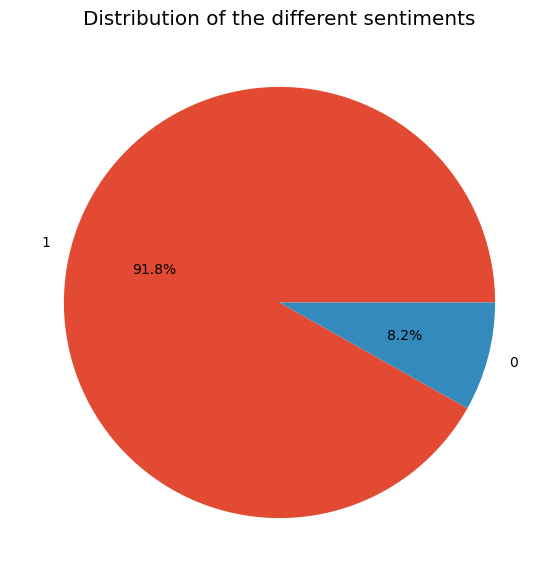

In [15]:
fig = plt.figure(figsize=(7,7))
tags = df['feedback'].value_counts()
tags.plot(kind='pie', autopct='%1.1f%%', label='')
plt.title("Distribution of the different sentiments")
plt.show()

#### Analysing the reviews of Black  Dot

In [16]:
black_dot = df[df.variation =="Black  Dot"]

In [17]:
black_dot.head()

,rating,date,variation,verified_reviews,feedback
2450,5,31-Jul-18,Black Dot,I set her up to play through our home theater ...,1
2452,5,31-Jul-18,Black Dot,beyond awesome,1
2453,5,31-Jul-18,Black Dot,I like that it responds every time. It was eas...,1
2454,5,31-Jul-18,Black Dot,Family loved it!,1
2455,5,31-Jul-18,Black Dot,,1


In [18]:
black_dot.shape

(516, 5)

In [19]:
black_dot["rating"].value_counts()

5    362
4     84
3     34
1     22
2     14
Name: rating, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

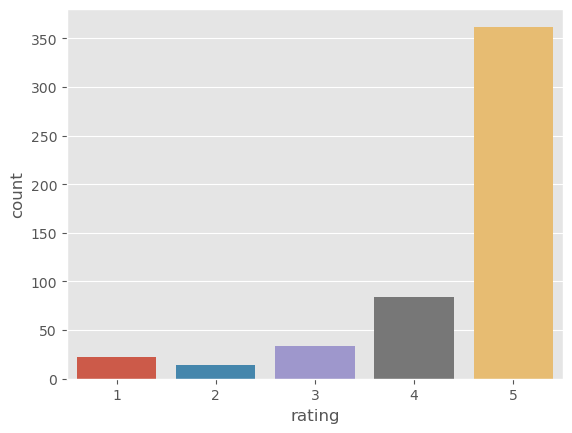

In [20]:
sns.countplot(x="rating",data=black_dot)

### Cleaning and  wordcloud 

In [21]:
for i in range(5):
    print(df['verified_reviews'].iloc[i],"\n")

Love my Echo! 

Loved it! 

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. 

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. 

Music 



In [22]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"http\S+www\S+|https\S+", '', text, flags= re.MULTILINE)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [23]:
df.verified_reviews = df['verified_reviews'].apply(data_processing)

In [24]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [25]:
df['verified_reviews'] = df['verified_reviews'].apply(lambda x: stemming(x))

In [26]:
for i in range(5):
    print(df['verified_reviews'].iloc[i],"\n")

love echo 

loved 

sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home 

lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well 

music 



In [27]:
pos_reviews = df[df.feedback == 1]
pos_reviews.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love echo,1
1,5,31-Jul-18,Charcoal Fabric,loved,1
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1
3,5,31-Jul-18,Charcoal Fabric,lot fun thing 4 yr old learns dinosaurs contro...,1
4,5,31-Jul-18,Charcoal Fabric,music,1


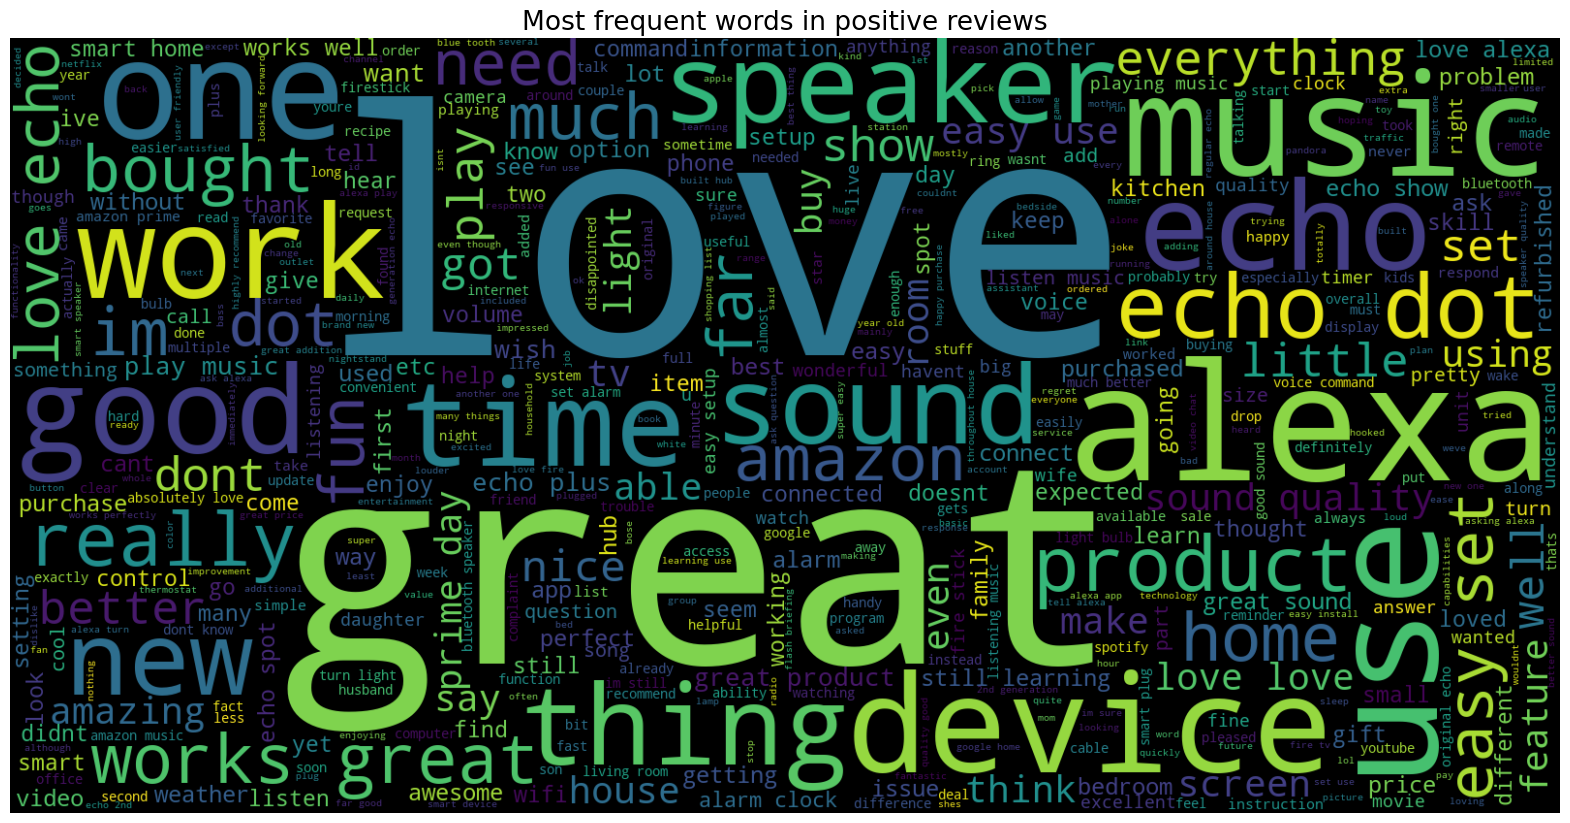

In [28]:
text = ' '.join([word for word in pos_reviews['verified_reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize=19)
plt.show()

In [29]:
neg_reviews = df[df.feedback==0]
neg_reviews.head()

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,like siri fact siri answers accurately alexa d...,0
111,2,30-Jul-18,Charcoal Fabric,sound terrible u want good music get bose,0
141,1,30-Jul-18,Charcoal Fabric,much features,0
162,1,30-Jul-18,Sandstone Fabric,stopped working 2 weeks didnt follow commands ...,0
176,2,30-Jul-18,Heather Gray Fabric,sad joke worthless,0


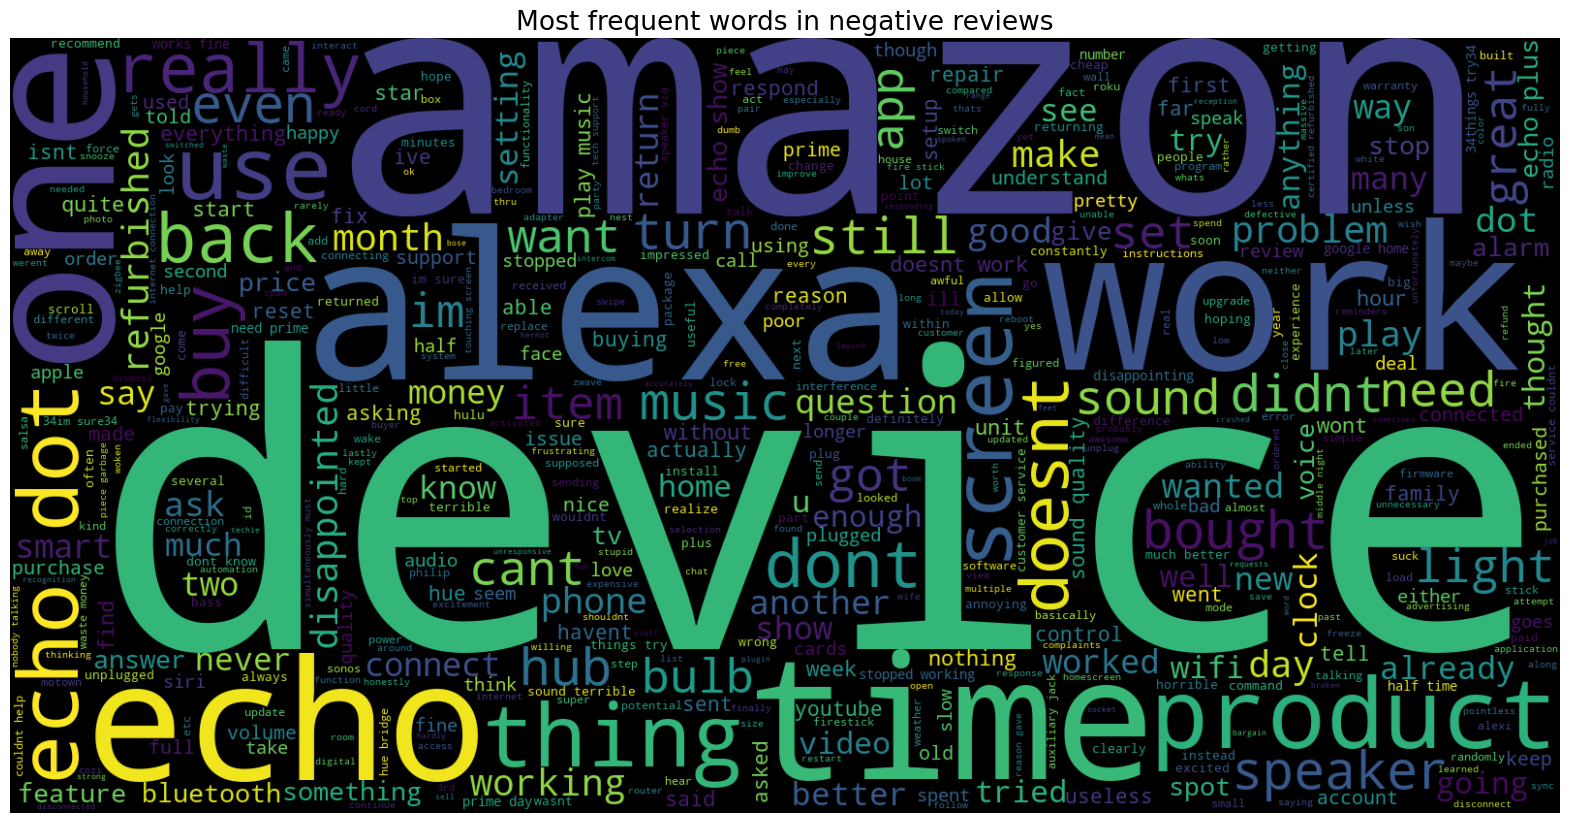

In [30]:
text = ' '.join([word for word in neg_reviews['verified_reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize=19)
plt.show()

### Building Model

In [31]:
X = df['verified_reviews']
Y = df['feedback']

In [32]:
print(X)

0                                               love echo
1                                                   loved
2       sometimes playing game answer question correct...
3       lot fun thing 4 yr old learns dinosaurs contro...
4                                                   music
                              ...                        
3145                         perfect kids adults everyone
3146    listening music searching locations checking t...
3147    love things running entire home tv lights ther...
3148    complaint sound quality isnt great mostly use ...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object


In [33]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64


In [34]:
cv = CountVectorizer()
X = cv.fit_transform(df['verified_reviews'])

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [36]:
print("Size of x_train: ",(x_train.shape))
print("Size of y_train: ",(y_train.shape))
print("Size of x_test: ",(x_test.shape))
print("Size of y_test: ",(y_test.shape))

Size of x_train:  (2520, 4364)
Size of y_train:  (2520,)
Size of x_test:  (630, 4364)
Size of y_test:  (630,)


In [37]:
print(x_train)

  (0, 311)	1
  (0, 2787)	1
  (0, 3861)	1
  (0, 959)	1
  (0, 1301)	1
  (0, 3541)	1
  (1, 2334)	1
  (1, 144)	1
  (1, 3009)	1
  (1, 452)	1
  (1, 3442)	1
  (1, 1693)	1
  (1, 298)	1
  (1, 4013)	1
  (1, 1347)	1
  (1, 2501)	1
  (1, 143)	1
  (1, 1555)	1
  (1, 4213)	2
  (1, 1679)	1
  (1, 4130)	1
  (1, 3688)	1
  (1, 934)	1
  (2, 1939)	1
  (2, 1399)	1
  :	:
  (2515, 2649)	1
  (2516, 2334)	1
  (2516, 1279)	1
  (2516, 3635)	1
  (2517, 928)	1
  (2517, 1608)	1
  (2517, 1789)	1
  (2518, 1691)	1
  (2518, 2282)	1
  (2518, 1117)	1
  (2518, 793)	2
  (2518, 1718)	1
  (2518, 3188)	1
  (2518, 3459)	1
  (2518, 2686)	1
  (2518, 2452)	1
  (2518, 816)	1
  (2518, 4081)	1
  (2518, 1888)	1
  (2518, 2711)	1
  (2518, 2585)	1
  (2518, 1473)	1
  (2518, 1587)	1
  (2519, 1277)	1
  (2519, 3394)	1


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 93.65%


In [40]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 21  37]
 [  3 569]]


              precision    recall  f1-score   support

           0       0.88      0.36      0.51        58
           1       0.94      0.99      0.97       572

    accuracy                           0.94       630
   macro avg       0.91      0.68      0.74       630
weighted avg       0.93      0.94      0.92       630



In [41]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 92.22%


In [42]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[ 15  43]
 [  6 566]]


              precision    recall  f1-score   support

           0       0.71      0.26      0.38        58
           1       0.93      0.99      0.96       572

    accuracy                           0.92       630
   macro avg       0.82      0.62      0.67       630
weighted avg       0.91      0.92      0.91       630



In [43]:
from sklearn.ensemble import RandomForestClassifier



In [44]:
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [45]:
classifier_pred =classifier.predict(x_test)
classifier_acc = accuracy_score(classifier_pred, y_test)
print("Test accuracy: {:.2f}%".format(classifier_acc*100))

Test accuracy: 93.33%


In [46]:
print(confusion_matrix(y_test,classifier_pred))
print("\n")
print(classification_report(y_test,classifier_pred))

[[ 21  37]
 [  5 567]]


              precision    recall  f1-score   support

           0       0.81      0.36      0.50        58
           1       0.94      0.99      0.96       572

    accuracy                           0.93       630
   macro avg       0.87      0.68      0.73       630
weighted avg       0.93      0.93      0.92       630



In [47]:
from xgboost import XGBClassifier

In [48]:
classifier =XGBClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
classifier_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(classifier_acc*100))

Test accuracy: 93.49%


In [49]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 22  36]
 [  5 567]]


              precision    recall  f1-score   support

           0       0.81      0.38      0.52        58
           1       0.94      0.99      0.97       572

    accuracy                           0.93       630
   macro avg       0.88      0.69      0.74       630
weighted avg       0.93      0.93      0.92       630



### saving the model

In [50]:
classifier=XGBClassifier()
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [51]:
import pickle

pickle.dump(classifier,open('model.pkl', 'wb'))

### Deep Learning

### model configuration 1

In [52]:
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Embedding,LSTM,SpatialDropout1D

In [53]:
tokenizer=Tokenizer(num_words=500,split=' ')
tokenizer.fit_on_texts(df['verified_reviews'])
X=tokenizer.texts_to_sequences(df['verified_reviews'])
X=pad_sequences(X)
X

array([[  0,   0,   0, ...,   0,   1,   2],
       [  0,   0,   0, ...,   0,   0, 175],
       [  0,   0,   0, ...,  71, 260,  21],
       ...,
       [  0,   0,   0, ...,  86,  45,  28],
       [  0,   0,   0, ..., 111, 122, 107],
       [  0,   0,   0, ...,   0,   0,  14]])

In [54]:
X.shape

(3150, 145)

In [55]:
Y=df['feedback']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [57]:
print("Size of x_train",x_train.shape)
print("Size of y_train",y_train.shape)
print("Size of x_test",x_test.shape)
print("Size of y_test",y_test.shape)

Size of x_train (2520, 145)
Size of y_train (2520,)
Size of x_test (630, 145)
Size of y_test (630,)


In [58]:
model=Sequential()
model.add(Embedding(500,120,input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 145, 120)          60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 145, 120)         0         
 ropout1D)                                                       
                                                                 
 dense (Dense)               (None, 145, 1)            121       
                                                                 
Total params: 60,121
Trainable params: 60,121
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
79/79 [==============================] - 4s 10ms/step - loss: 0.5084 - accuracy: 0.8624
Epoch 2/10
79/79 [==============================] - 1s 10ms/step - loss: 0.2956 - accuracy: 0.9211
Epoch 3/10
79/79 [==============================] - 1s 9ms/step - loss: 0.2766 - accuracy: 0.9211
Epoch 4/10
79/79 [==============================] - 1s 9ms/step - loss: 0.2774 - accuracy: 0.9211
Epoch 5/10
79/79 [==============================] - 1s 9ms/step - loss: 0.2758 - accuracy: 0.9211
Epoch 6/10
79/79 [==============================] - 1s 9ms/step - loss: 0.2741 - accuracy: 0.9211
Epoch 7/10
79/79 [==============================] - 1s 9ms/step - loss: 0.2760 - accuracy: 0.9211
Epoch 8/10
79/79 [==============================] - 1s 8ms/step - loss: 0.2751 - accuracy: 0.9211
Epoch 9/10
79/79 [==============================] - 1s 8ms/step - loss: 0.2762 - accuracy: 0.9211
Epoch 10/10
79/79 [==============================] - 1s 7ms/step - loss: 0.2743 - accuracy: 0.9211


In [60]:
scores=model.evaluate(x_test,y_test)
print("Accuracy=%0.3f"%(scores[1]*100))

20/20 [==============================] - 0s 4ms/step - loss: 0.3072 - accuracy: 0.9078
Accuracy=90.782


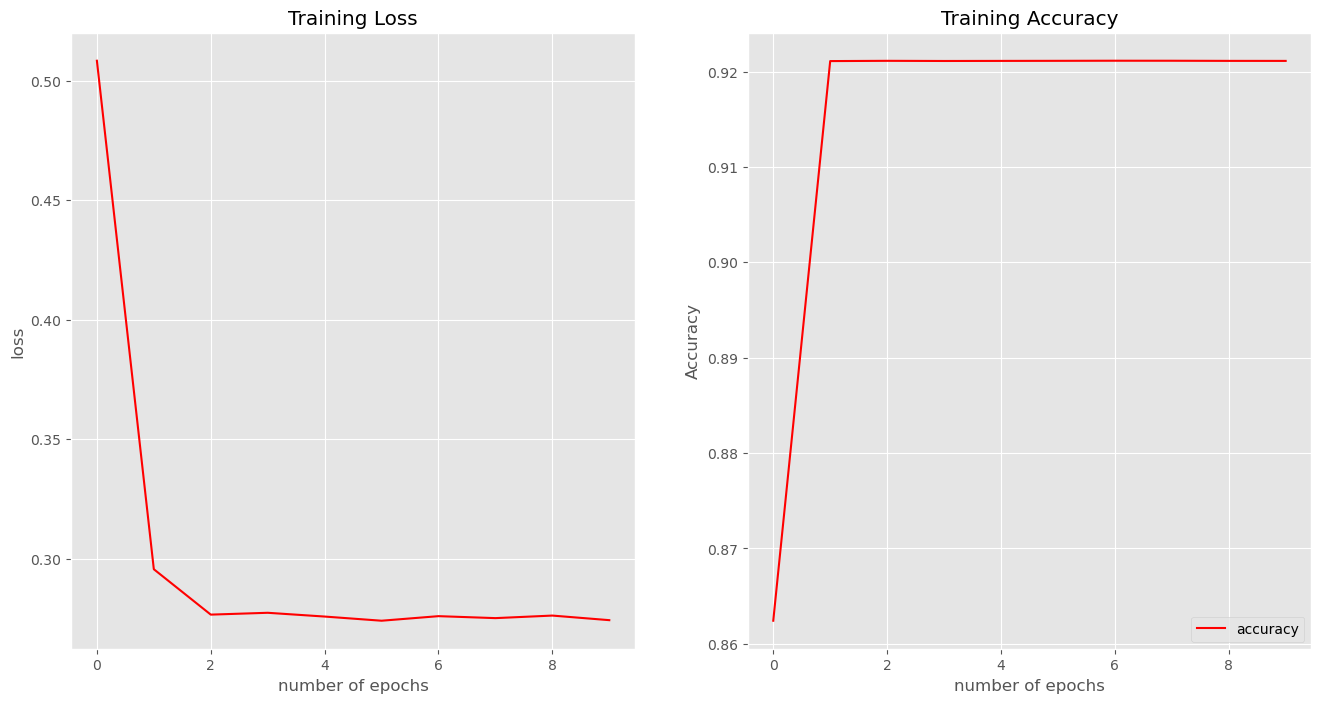

In [61]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],color='r',label='loss')
plt.title("Training Loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],color='r',label='accuracy')
plt.title("Training Accuracy")
plt.xlabel("number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### model configuration 2

In [62]:
model=Sequential()
model.add(Embedding(500,120,input_length=X.shape[1]))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 145, 120)          60000     
                                                                 
 lstm (LSTM)                 (None, 32)                19584     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 79,617
Trainable params: 79,617
Non-trainable params: 0
_________________________________________________________________
None


In [63]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
79/79 [==============================] - 14s 91ms/step - loss: 0.3484 - accuracy: 0.9099
Epoch 2/10
79/79 [==============================] - 5s 68ms/step - loss: 0.2483 - accuracy: 0.9218
Epoch 3/10
79/79 [==============================] - 5s 69ms/step - loss: 0.1743 - accuracy: 0.9329
Epoch 4/10
79/79 [==============================] - 5s 68ms/step - loss: 0.1283 - accuracy: 0.9532
Epoch 5/10
79/79 [==============================] - 5s 68ms/step - loss: 0.1041 - accuracy: 0.9627
Epoch 6/10
79/79 [==============================] - 5s 68ms/step - loss: 0.0939 - accuracy: 0.9671
Epoch 7/10
79/79 [==============================] - 5s 68ms/step - loss: 0.0738 - accuracy: 0.9734
Epoch 8/10
79/79 [==============================] - 5s 68ms/step - loss: 0.0611 - accuracy: 0.9782
Epoch 9/10
79/79 [==============================] - 5s 68ms/step - loss: 0.0537 - accuracy: 0.9810
Epoch 10/10
79/79 [==============================] - 5s 68ms/step - loss: 0.0537 - accuracy: 0.9825


In [64]:
scores=model.evaluate(x_test,y_test)
print("Accuracy=%0.3f"%(scores[1]*100))

20/20 [==============================] - 2s 27ms/step - loss: 0.2402 - accuracy: 0.9286
Accuracy=92.857


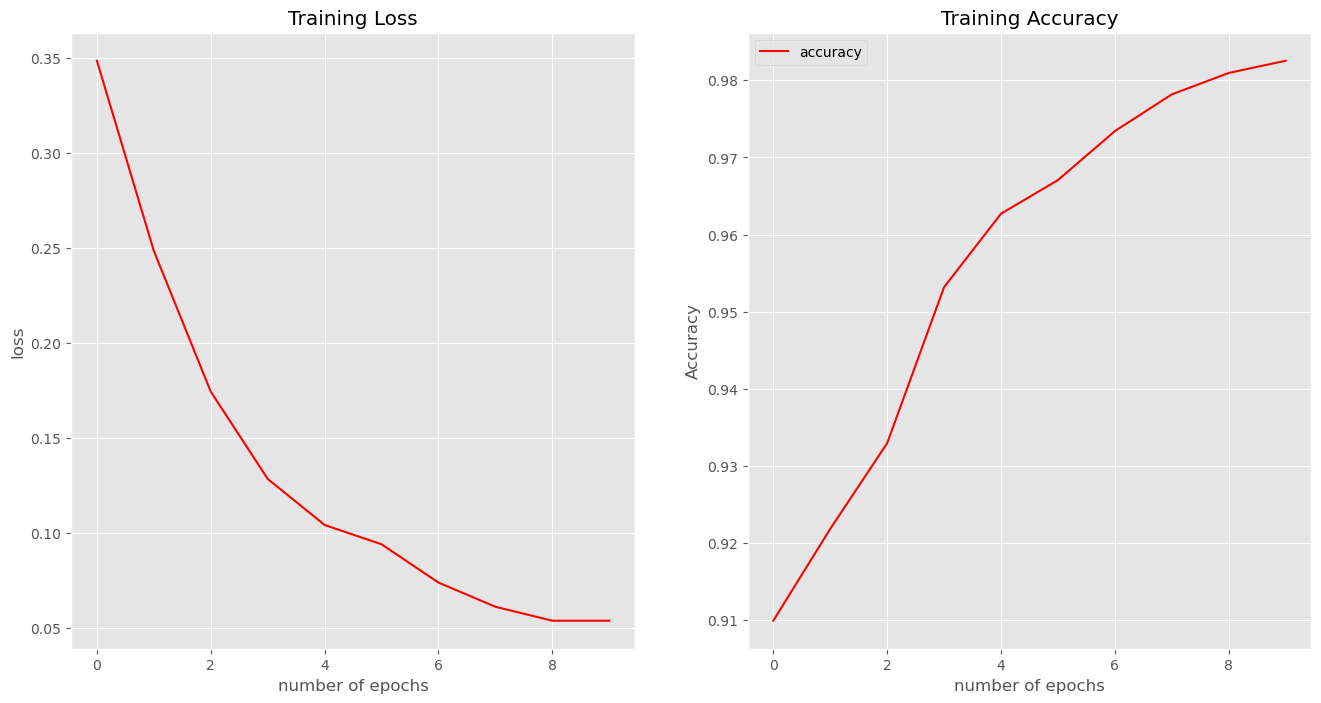

In [65]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],color='r',label='loss')
plt.title("Training Loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],color='r',label='accuracy')
plt.title("Training Accuracy")
plt.xlabel("number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()